In [ ]:
#Connect to gdrive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#importing data for modeling
import pandas as pd
datamodel=pd.read_csv('/content/drive/MyDrive/HomeCredit/application_train.csv')

In [ ]:
#Data Understanding
datamodel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [ ]:
#Data Understanding
datamodel.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [ ]:
#Data Understanding
datamodel.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [ ]:
#Data cleansing
#replacing missing value of data train's OWN_CAR_AGE column with 0
import numpy as np
datamodel['OWN_CAR_AGE'] = datamodel['OWN_CAR_AGE'].replace(np.nan, 0)

In [ ]:
#Data Cleansing
#Delete the unused columns
datamodel = datamodel.drop(['SK_ID_CURR','NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_HOUSING_TYPE','OCCUPATION_TYPE','WEEKDAY_APPR_PROCESS_START','ORGANIZATION_TYPE','HOUSETYPE_MODE','WALLSMATERIAL_MODE'],axis=1)

In [ ]:
#Data cleansing
#checking the missing data train
print("Data length before cleansing:",datamodel.shape[0])
print("Number of missing data:",datamodel.isna().sum().sum())

#deleting the missing data train
datamodel = datamodel.dropna()
print("Data length after cleansing:",datamodel.shape[0])
print("Number of missing data after cleansing:",datamodel.isna().sum().sum())

Data length before cleansing: 307511
Number of missing data: 8541215
Data length after cleansing: 30118
Number of missing data after cleansing: 0


In [ ]:
#Data cleansing
#Checking the duplicated data
print("Number of duplicated data train",datamodel.duplicated().sum())

Number of duplicated data train 0


In [ ]:
#Data preparation
#Splitting data train to features and target dataframe
Feature = datamodel.drop(['TARGET'],axis=1)
Target = datamodel['TARGET']

In [ ]:
#Data preparation
#Transforming categorical data to numerical data
Feature = pd.get_dummies(Feature)

In [ ]:
#Data preparation
#Data normalization
from sklearn import preprocessing
import numpy as np
scaler = preprocessing.StandardScaler().fit(Feature)
Feature = scaler.transform(Feature)

In [ ]:
#Data preparation
#splitting data (80% data train and 20% data test) 
from sklearn.model_selection import train_test_split
Feature_train, Feature_test, Target_train, Target_test = train_test_split(Feature, Target, test_size=0.20,random_state=0)

In [ ]:
#Checking the length of data train and data test
print('Data train shape:',Feature_train.shape)
print('Target train shape:',Target_train.shape)
print('Data test shape:',Feature_test.shape)
print('Target test shape:',Target_test.shape)

Data train shape: (24094, 124)
Target train shape: (24094,)
Data test shape: (6024, 124)
Target test shape: (6024,)


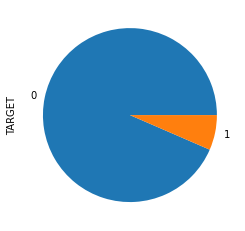

In [ ]:
#Data Train's TARGET distribution
import matplotlib.pyplot as plt
import pandas as pd

Target_train.value_counts().plot(kind='pie')
plt.show()

In [ ]:
#Data preparation
#Class Imbalance handling with SMOTE method
from imblearn.over_sampling import SMOTE
from collections import Counter

# summarize class distribution
print("Before oversampling: ",Counter(Target_train))

# define oversampling strategy
SMOTE= SMOTE()

# fit and apply the transform 
Feature_train,Target_train= SMOTE.fit_resample(Feature_train,Target_train)

# summarize class distribution
print("After oversampling: ",Counter(Target_train))

Before oversampling:  Counter({0: 22525, 1: 1569})
After oversampling:  Counter({0: 22525, 1: 22525})


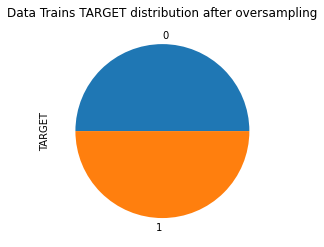

In [ ]:
#Data Train's TARGET distribution after oversampling
import matplotlib.pyplot as plt
import pandas as pd

Target_train.value_counts().plot(kind='pie')
plt.title('Data Trains TARGET distribution after oversampling')
plt.show()

In [120]:
#Checking the length of data train and data test
print('Data train shape:',Feature_train.shape)
print('Target train shape:',Target_train.shape)
print('Target train count:\n',Target_train.value_counts())

Data train shape: (45050, 124)
Target train shape: (45050,)
Target train count:
 0    22525
1    22525
Name: TARGET, dtype: int64


In [ ]:
#Data modeling
#Classification with Logistic Regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(Feature_train,Target_train)
print('model score:',model.score(Feature_train,Target_train))

model score: 0.7250610432852386


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
#Logistic regression model testing
predict = model.predict(Feature_test)

# Print results: 
from sklearn.metrics import classification_report, confusion_matrix

print("confusion matrix:\n",confusion_matrix(Target_test, predict))
print("\nModel report:\n",classification_report(Target_test, predict))

confusion matrix:
 [[4003 1635]
 [ 140  246]]

Model report:
               precision    recall  f1-score   support

           0       0.97      0.71      0.82      5638
           1       0.13      0.64      0.22       386

    accuracy                           0.71      6024
   macro avg       0.55      0.67      0.52      6024
weighted avg       0.91      0.71      0.78      6024



In [ ]:
#Data modeling
#Classification with Random Forest
from sklearn.ensemble import RandomForestClassifier

model2=RandomForestClassifier(n_estimators=100,random_state=42)
model2.fit(Feature_train, Target_train)
print('model score:',model2.score(Feature_train,Target_train))

model score: 1.0


In [ ]:
#Random Forest model testing
predict2 = model2.predict(Feature_test)

# Print results: 
from sklearn.metrics import classification_report, confusion_matrix

print("confusion matrix:\n",confusion_matrix(Target_test, predict2))
print("\nModel report:\n",classification_report(Target_test, predict2))

confusion matrix:
 [[5625   13]
 [ 383    3]]

Model report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97      5638
           1       0.19      0.01      0.01       386

    accuracy                           0.93      6024
   macro avg       0.56      0.50      0.49      6024
weighted avg       0.89      0.93      0.91      6024



In [ ]:
#Data modeling
#Classification with Support Vector Machine
from sklearn.svm import SVC
model3 = SVC()
model3.fit(Feature_train, Target_train)

print('model score:',model3.score(Feature_train,Target_train))

model score: 0.9384683684794672


In [121]:
#Random Forest model testing
predict3 = model3.predict(Feature_test)

# Print results: 
from sklearn.metrics import classification_report, confusion_matrix

print("confusion matrix:\n",confusion_matrix(Target_test, predict3))
print("\nModel report:\n",classification_report(Target_test, predict3)) 

confusion matrix:
 [[4941  697]
 [ 266  120]]

Model report:
               precision    recall  f1-score   support

           0       0.95      0.88      0.91      5638
           1       0.15      0.31      0.20       386

    accuracy                           0.84      6024
   macro avg       0.55      0.59      0.56      6024
weighted avg       0.90      0.84      0.87      6024



In [106]:
#Data prediction with new data
#importing the new data
newapplication = pd.read_csv('/content/drive/MyDrive/HomeCredit/application_test.csv')
newapplication.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 45.0+ MB


In [107]:
#Data cleansing
#replacing missing value of data train's OWN_CAR_AGE column with 0
import numpy as np
newapplication['OWN_CAR_AGE'] = newapplication['OWN_CAR_AGE'].replace(np.nan, 0)

In [108]:
#checking the missing data of new data
print("Data test's length before cleansing",newapplication.shape[0])
print("Number of missing data before cleansing",newapplication.isna().sum().sum())

#deleting the missing data test
newapplication = newapplication.dropna()
print("Data test's length after cleansing",newapplication.shape[0])
print("Number of missing data after cleansing",newapplication.isna().sum().sum())

Data test's length before cleansing 48744
Number of missing data before cleansing 1372107
Data test's length after cleansing 4733
Number of missing data after cleansing 0


In [109]:
#checking the duplicated data of new data
print("Number of duplicated data test",newapplication.duplicated().sum())

Number of duplicated data test 0


In [110]:
#Deleting unused column
newdata = newapplication.drop(['SK_ID_CURR','NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_HOUSING_TYPE','OCCUPATION_TYPE','WEEKDAY_APPR_PROCESS_START','ORGANIZATION_TYPE','HOUSETYPE_MODE','WALLSMATERIAL_MODE'],axis=1)

In [111]:
#Transforming categorical data to numerical data
newdata = pd.get_dummies(newdata)

In [112]:
#Filling the blank data
newdata['CODE_GENDER_XNA'] = 0
newdata['FLAG_OWN_CAR_N'] = 0

In [113]:
#The length of Data train and the new data
print('Shape of Features Dataframe',Feature_train.shape)
print('Shape of Target Dataframe',newdata.shape)

Shape of Features Dataframe (45050, 124)
Shape of Target Dataframe (4733, 124)


In [114]:
#New Data normalization
from sklearn import preprocessing
import numpy as np
scaler = preprocessing.StandardScaler().fit(newdata)
newdata = scaler.transform(newdata)

In [115]:
#Predict the classification of new data
newdata_prediction = model2.predict(newdata)

Target Label counts:
 1    4493
0     240
dtype: int64


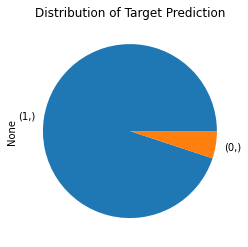

In [124]:
#Data prediction distribution
import matplotlib.pyplot as plt
import pandas as pd

print('Target Label counts:\n',pd.DataFrame(newdata_prediction).value_counts())
pd.DataFrame(newdata_prediction).value_counts().plot(kind='pie')
plt.title('Distribution of Target Prediction')
plt.show()

In [123]:
#Add the Target Prediction to the Dataset
newapplication['TARGET']=newdata_prediction
DataFinal = newapplication[['SK_ID_CURR','TARGET']]
print(DataFinal)

       SK_ID_CURR  TARGET
3          100028       1
15         100107       1
18         100128       1
20         100150       1
33         100245       1
...           ...     ...
48710      455959       1
48713      455962       1
48719      456010       1
48724      456111       1
48727      456116       1

[4733 rows x 2 columns]


In [ ]:
#Export the Data Final
DataFinal.to_csv('DataFinal.csv')